In [1]:
# from create_dataset_shorter import *
from create_dataset_more_conectivity import *
import matplotlib.cm as cm
from skimage.segmentation import *

%matplotlib inline

reading data


In [2]:
# def create_one_sample(i):
#     x = []
#     y = []
#     pos = []
#     edge_index = []
#     edge_slice = [0]
#     print('Generating patches')
#     w = padgen.transform(combined[i])
#     print('Done')
#     print('Computing central pixels')
#     m = padgen.get_central_pixels(mask[i])
#     print('Done')
#     print('Segmentating of each patch')
#     s = [segmentation_algorithm(ww.squeeze()) for ww in tqdm(w)]
#     print('Done')
#     print('generating graphs')
#     g = [graph_maker(ww.squeeze(), ss) for ww, ss in tqdm(list(zip(w,s)))]
#     print('Done')
#     print('Collecting data')
#     for mm, gg in zip(m,g):
#         node_pos = np.zeros((gg.number_of_nodes(),2))
#         for k,d in gg.nodes(data=True):
#             node_pos[k,0] = d['centroid'][0]
#             node_pos[k,1] = d['centroid'][1] 
#         node_values = list(map(lambda n: n[1]['mean color'][0], gg.nodes(data=True)))
#         x.append(node_values)
#         pos.append(node_pos)
#         edge_index +=[[e[0],e[1]] for e in gg.edges]
#         last_slice = edge_slice[-1]
#         edge_slice += [last_slice+gg.number_of_edges()]
#         y.append(mm)
#     print('Done')
#     data = (torch.tensor(x),
#         torch.tensor(edge_index).t(),
#         torch.tensor(edge_slice),
#         torch.tensor(pos),
#         torch.tensor(y),
#         w,
#         s,
#         g)
#     return data

In [3]:
# def plot_one(d,idx):
#     g = d[7][idx]
#     image = d[5][idx].copy()
#     start, end = d[2][idx],d[2][idx+1] 
#     pos_x = d[3][idx,:,0].numpy()
#     pos_y = d[3][idx,:,1].numpy()
#     coo_matrix = d[1][:,start:end] 
#     plt.figure(figsize=(10,10))
#     xmin, xmax, ymin, ymax = 0, 21, 0, 21
#     plt.subplot(1,2,1)
#     for i in range(d[7][idx].number_of_edges()):
#         ii, jj = coo_matrix[0,i], coo_matrix[1,i]
#         plt.plot([pos_x[ii],pos_x[jj]],[pos_y[ii],pos_y[jj]],'k-',alpha=0.1)
#     plt.plot(pos_x, pos_y, 'ro')
#     plt.axis('scaled')
#     plt.xlim([xmin,xmax])
#     plt.ylim([ymin,ymax])
#     plt.subplot(1,2,2)
#     image = d[5][idx].copy()
#     image = color.gray2rgb(image.squeeze())
#     print(image.shape)
#     plt.imshow(image.transpose((1,0,2)))
#     for i in range(d[7][idx].number_of_edges()):
#         ii, jj = coo_matrix[0,i], coo_matrix[1,i]
#         plt.plot([pos_x[ii],pos_x[jj]],[pos_y[ii],pos_y[jj]],'g-',alpha=1.0)
#     values =  d[0][idx,:].numpy()
#     colors = [cm.cool(color) for color in values]
    
#     for xx, yy, cc in zip(pos_x, pos_y, colors):
#         plt.plot(xx, yy, 'o', color=cc)
#     plt.axis('scaled')
    
#     plt.xlim([xmin,xmax])
#     plt.ylim([ymin,ymax])

In [8]:
def plot_graph(g, image=None):
    nodes_data = dict(g.nodes(data=True))
    pos_x, pos_y = np.zeros(g.number_of_nodes()), np.zeros(g.number_of_nodes())
    for k,d in nodes_data.items():
        pos_x[k] = d['centroid'][0]
        pos_y[k] = d['centroid'][1] 

    np.zeros(g.number_of_nodes())
    coo_matrix = np.array([[e[0],e[1]] for e in g.edges]).T
    print(coo_matrix)
    plt.figure(figsize=(10,10))
    if image is not None:
        xmin, xmax, ymin, ymax = -0.5, image.shape[0]-0.5, -0.5, image.shape[1]-0.5
    else:
        xmin, xmax, ymin, ymax = -0.5, max(pos_x)+0.5, -0.5, max(pos_y)+0.5
    if image is not None:
        image = image.copy()/image.max()
        image = color.gray2rgb(image.squeeze())
        plt.imshow(image.transpose((1,0,2)))
    
    for i in range(g.number_of_edges()):
        ii, jj = coo_matrix[0,i], coo_matrix[1,i]
        plt.plot([pos_x[ii],pos_x[jj]],[pos_y[ii],pos_y[jj]],'g-',alpha=1.0)
    print(list(nodes_data.values())[0])
    values = np.zeros(g.number_of_nodes())
    for k, d in nodes_data.items():
        values[k] = d['mean color'][0] 
    colors = [cm.viridis(color) for color in values]
    
    for xx, yy, cc in zip(pos_x, pos_y, colors):
        plt.plot(xx, yy, 'o', color=cc)
    plt.axis('scaled')
#     plt.colorbar()
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])

In [9]:
def plot_one(d,idx):
    g = d[7][idx]
    image = d[5][idx].copy()
    plot_graph(g)
    plot_graph(g,image=image)

In [6]:
segmentation_algorithm = lambda x: slic(x, n_segments=50)
data = create_one_sample(0,threshold_dist=7.5, num_nodes=50)
data[0].size()

  0%|          | 10/5376 [00:00<00:55, 97.18it/s]

Generating patches
Done
Computing central pixels
Done
Segmentating of each patch


  0%|          | 2/5376 [00:00<04:30, 19.86it/s]

Done
generating graphs


100%|██████████| 5376/5376 [04:02<00:00, 22.15it/s]


Done
Done


torch.Size([5376, 50])

[[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  4  4  4  4  4  4  4  4  4  4
   4  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  7  7  7  7  7  7  7
   7  7 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 12 12
  12 12 12 12  2  2  8  8  8 17 17 17 17 17  3  3  9  9  9  9  9  9  9  9
   9 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14 14 14
  15 15 15 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 16
  23 23 23 23 23 23 23 23 23 23 23 18 18 18 18 24 24 24 24 19 19 19 19 19
  19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 21 21 21
  21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22 22 22 22 22 22 22 26 26
  26 26 26 26 26 26 26 26 26 26 26 26 26 26 28 28 28 28 28 28 28 28 28 28
  28 28 28 28 28 28 29 29 29 29 29 29 29 29 29 29 29 29 29 29 30 30 30 30
  30 30 30 30 30 30 30 31 31 31 31 31 31 31 31 25 25 25 25 25 25 25 25 27
  27 27 27 27 27 27 27 27 27 27 27 33 33 33 33 33 33 33 34 34 34 34 34 34
  34 34 34 34 35 35 35 35 35 35 35 35 

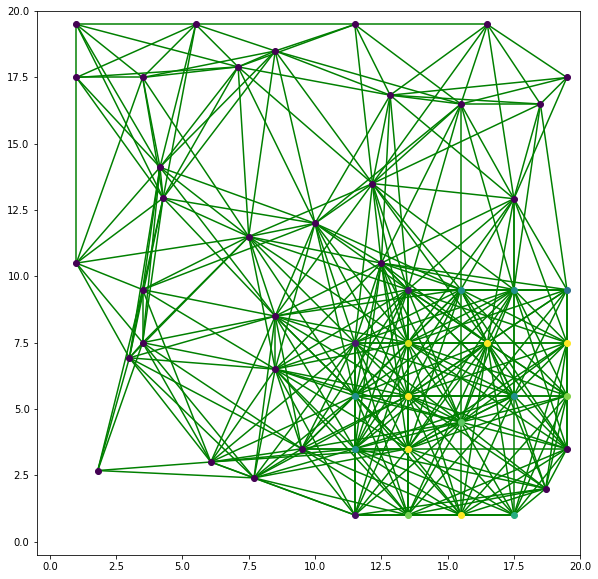

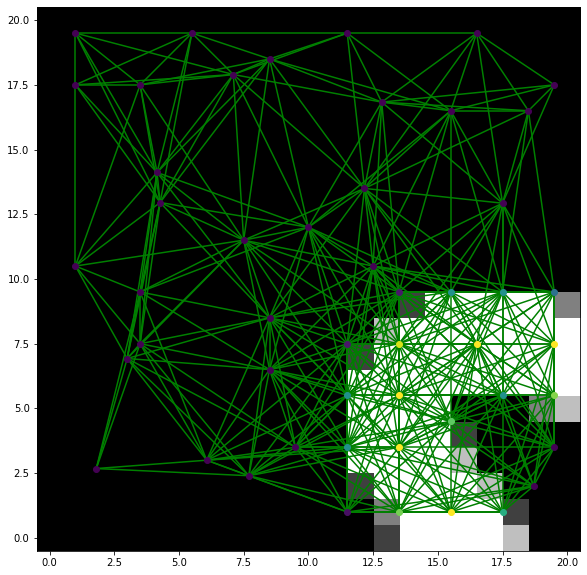

In [10]:
plot_one(data,1541)

In [ ]:
segmentation_algorithm = lambda x: slic(x, n_segments=9, compactness=0.0001, max_iter=20)
# segmentation_algorithm = lambda x: random_walker(x,np.random.randint(1,9,size=x.shape))


In [ ]:
test1 = np.array([[0.2,0.2,1,1,0,0],[0.2,0.2,1,1,0,0],[0.7,0.7,0,0,1,1],[0.7,0.7,0,0,1,1],[0,0,1,1,0,0],[0,0,1,1,0,0]],dtype=float)
mask1 = segmentation_algorithm(test1)

In [ ]:
plt.subplot(121)
plt.imshow(test1)
plt.subplot(122)
plt.imshow(mask1)

In [ ]:
g = graph_maker(test1,mask1,num_nodes=9,threshold=3.0)

In [ ]:
print(mask1.shape)
plot_graph(g,image=test1)
plt.colorbar()

In [ ]:
dict(g.nodes(data=True))

In [ ]:
g.edges

In [ ]:
plt.plot( [0.5, 2.5], [0.5, 0.5])